In [97]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.0f}'.format)
df = pd.read_csv('Data/train.csv')
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2,1,...,23533,nan,nan,2015-08-23 00:00:00,0,0,0,0,0,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10,3,2,...,24514,19,-99,2013-06-28 00:00:00,0,0,0,1,1,3600000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5,3,2,...,48551,nan,nan,2015-10-17 00:00:00,0,0,0,0,0,1200000
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1,2,1,...,53666,19,-100,2012-03-09 00:00:00,0,0,0,1,1,650000
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10,2,1,...,47835,nan,nan,2016-06-07 00:00:00,0,0,0,0,0,1150000


## ¿Cuáles son los tipos de propiedad?

In [98]:
df.tipodepropiedad.value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

## ¿Cuántas propiedades por provincia hay?

In [99]:
#Me quedo con las propiedades habitables
tipoDePropiedadHabitable = ['Casa', 'Apartamento', 'Casa en condominio', 'Duplex', 'Departamento Compartido', 'Lote']
df = df[df.tipodepropiedad.isin(tipoDePropiedadHabitable)]

#Elimino las propiedades que no tienen provincia
df = df.dropna(subset=['provincia'])

df.provincia.value_counts()

#¿ZACATECAS SE QUEDA YAY OR NAY?

Distrito Federal         54349
Edo. de México           39133
Jalisco                  18796
Querétaro                15044
Nuevo León               13406
Puebla                    9485
San luis Potosí           7529
Yucatán                   7368
Morelos                   6998
Veracruz                  5102
Quintana Roo              4209
Chihuahua                 3942
Coahuila                  3370
Baja California Norte     3159
Sonora                    2774
Guanajuato                2601
Guerrero                  2469
Hidalgo                   2270
Michoacán                 2221
Tamaulipas                2087
Durango                   2037
Sinaloa                   1592
Baja California Sur       1591
Aguascalientes            1584
Nayarit                   1175
Chiapas                    970
Colima                     909
Tabasco                    849
Tlaxcala                   776
Oaxaca                     595
Campeche                   228
Zacatecas                   84
Name: pr

## ¿Cuáles son las provincias con propiedades más caras y cuáles con las más baratas?

In [100]:
provincia_precio = df.groupby('provincia')['precio'].mean()
provincia_precio = provincia_precio.sort_values(ascending=False)

In [101]:
#Creo mi mapa de mexico
mexico = geopandas.read_file('Data/mexstates.shp') #Los estados pueden ser vistos con mexico.ADMIN_NAME

#Le pongo los tildes al archivo de estados para que me coincidan con las provincias
mexico["ADMIN_NAME"].replace({'Nuevo Leon': "Nuevo León",
                               "San Luis Potosi": "San luis Potosí",
                               "Queretaro": "Querétaro",
                               "Yucatan": "Yucatán",
                               "Michoacan": "Michoacán",
                               "Mexico": "Edo. de México",
                               "Baja California": "Baja California Norte"}, inplace=True)

#Hago un nuevo dataframe con la información del mapa y la antiguedad para cada provincia
gdf = mexico.set_index("ADMIN_NAME").join(provincia_precio)

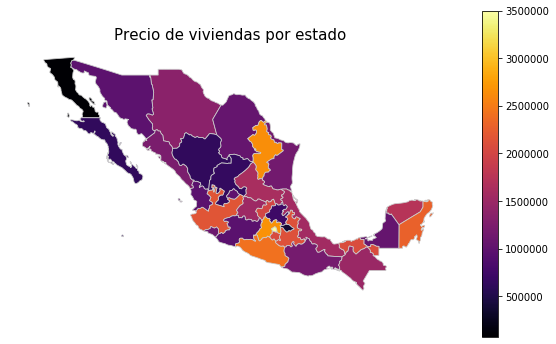

In [102]:
#Grafico el mapa

#Base donde se va a dibujar
fig, base = plt.subplots(1, figsize=(10, 6))

#Saco los ejes de lat y lng ya que no aportan al gráfico
base.axis("off")

#Pido que me coloreé en base a la antiguedad
gdf.plot(column="precio", cmap="inferno", linewidth=0.8, ax=base, edgecolor="0.8")

#Setteo el título al gráfico
base.set_title("Precio de viviendas por estado", fontsize = 15)

#Agrego la barra que indica la antiguedad
sm = plt.cm.ScalarMappable(cmap="inferno", norm=plt.Normalize(vmin=75000, vmax=3500000))
cbar = fig.colorbar(sm)

### Top 5 estados con viviendas más caras

In [103]:
provincia_precio_df = provincia_precio.to_frame()
provincia_precio_df.rename(columns = {'precio': 'Precio promedio de propiedad'}, inplace=True)

In [104]:
provincia_precio_df.head(5)

,Precio promedio de propiedad
provincia,
Distrito Federal,3404453
Edo. de México,2767100
Nuevo León,2747403
Guerrero,2573384
Quintana Roo,2473487


### Top 5 estados con viviendas más baratas

In [105]:
provincia_precio_df.tail(5).nsmallest(5, "Precio promedio de propiedad")

,Precio promedio de propiedad
provincia,
Baja California Norte,763808
Tlaxcala,1006894
Durango,1187782
Baja California Sur,1196050
Zacatecas,1208328
